In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#Exploring Topics in Data Science

##Clustering in Python

###1: Loading in the data

We have a csv file that contains all the votes from the 114th Senate.

Each row contains the votes of an individual senator. Votes are coded as 0 for "No", 1 for "Yes", and 0.5 for "Abstain".

In [7]:
import pandas as pd
# Read in the csv file
votes = pd.read_csv("data/114_congress.csv")

# As you can see, there are 100 senators, and they voted on 15 bills (we subtract 3 because the first 3 columns aren't bills).
print(votes.shape)

# We have more "Yes" votes than "No" votes overall
print(pd.value_counts(votes.iloc[:,3:].values.ravel()))

(100, 18)
1.0    803
0.0    669
0.5     28
dtype: int64


###2: Initial clustering

k-means clustering will try to make clusters out of the senators.

Each cluster will contain senators whose votes are as similar to each other as possible.

We'll need to specify the number of clusters we want upfront.

Let's try 2 to see how that looks.

In [3]:
import pandas as pd
from sklearn.cluster import KMeans

# Create a kmeans model on our data, using 2 clusters.  random_state helps ensure that the algorithm returns the same results each time.
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(votes.iloc[:, 3:])

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = kmeans_model.labels_

# The clustering looks pretty good!
# It's separated everyone into parties just based on voting history
print(pd.crosstab(labels, votes["party"]))

party   D  I   R
row_0           
0      41  2   0
1       3  0  54


###3: Exploring people in the wrong cluster

We can now find out which senators are in the "wrong" cluster.

These senators are in the cluster associated with the opposite party.

In [11]:
# Let's call these types of voters "oddballs" (why not?)
# There aren't any republican oddballs
democratic_oddballs = votes[(labels == 1) & (votes["party"] == "D")]

# It looks like Reid has abstained a lot, which changed his cluster.
# Manchin seems like a genuine oddball voter.
print(democratic_oddballs["name"])

42    Heitkamp
56     Manchin
74        Reid
Name: name, dtype: object


###4: Plotting out the clusters

Let's explore our clusters a little more by plotting them out.

Each column of data is a dimension on a plot, and we can't visualize 15 dimensions.

We'll use principal component analysis to compress the vote columns into two.

Then, we can plot out all of our senators according to their votes, and shade them by their cluster.

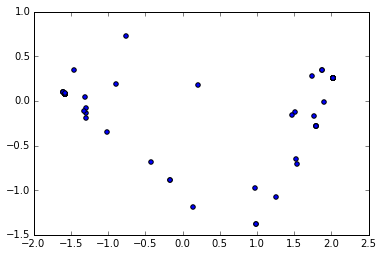

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

pca_2 = PCA(2)

# Turn the vote data into two columns with PCA
plot_columns = pca_2.fit_transform(votes.iloc[:,3:18])

# Plot senators based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1])
plt.show()

###5: Trying even more clusters

While two clusters is interesting, it didn't tell us anything we don't already know.

More clusters could show wings of each party, or cross-party groups.

Let's try using 5 clusters to see what happens.

In [26]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=5, random_state=1).fit(votes.iloc[:, 3:])
labels = kmeans_model.labels_

# The republicans are still pretty solid, but it looks like there are two democratic "factions"
print(pd.crosstab(labels, votes["party"]))

party   D  I   R
row_0           
0       6  0   0
1       0  0  52
2      31  1   0
3       0  0   2
4       7  1   0
